<a href="https://colab.research.google.com/github/Goutham345/AIML/blob/main/28-10-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
cancer = datasets.load_breast_cancer()
print("Dataset Keys:", cancer.keys())

Dataset Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [26]:
data = cancer['data']
features = cancer['feature_names']
target = cancer['target']
target_names = cancer['target_names']

In [27]:
df = pd.DataFrame(data, columns=features)
df['target'] = target

In [28]:
print("Dataset Description:\n", cancer['DESCR'])
print("\nDataframe Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is

In [29]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

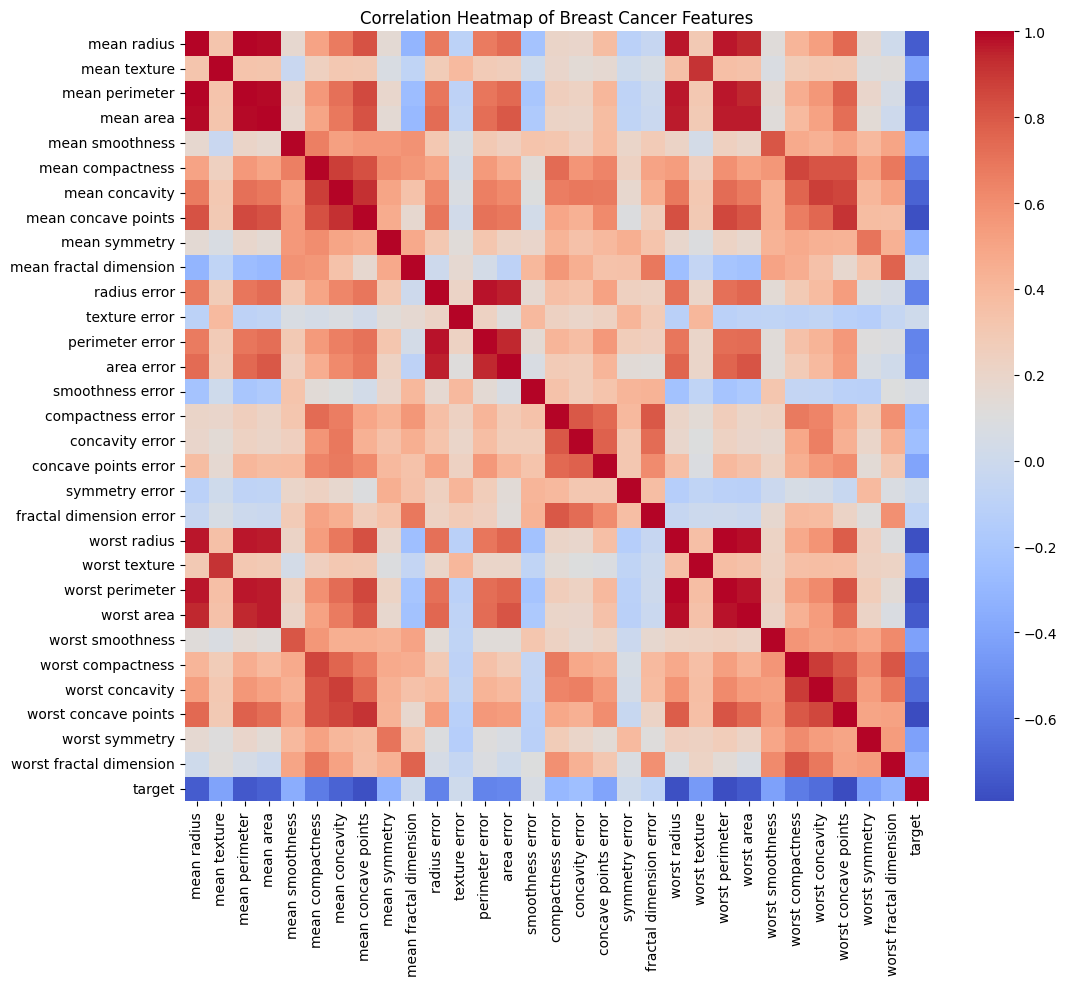

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Breast Cancer Features")
plt.show()

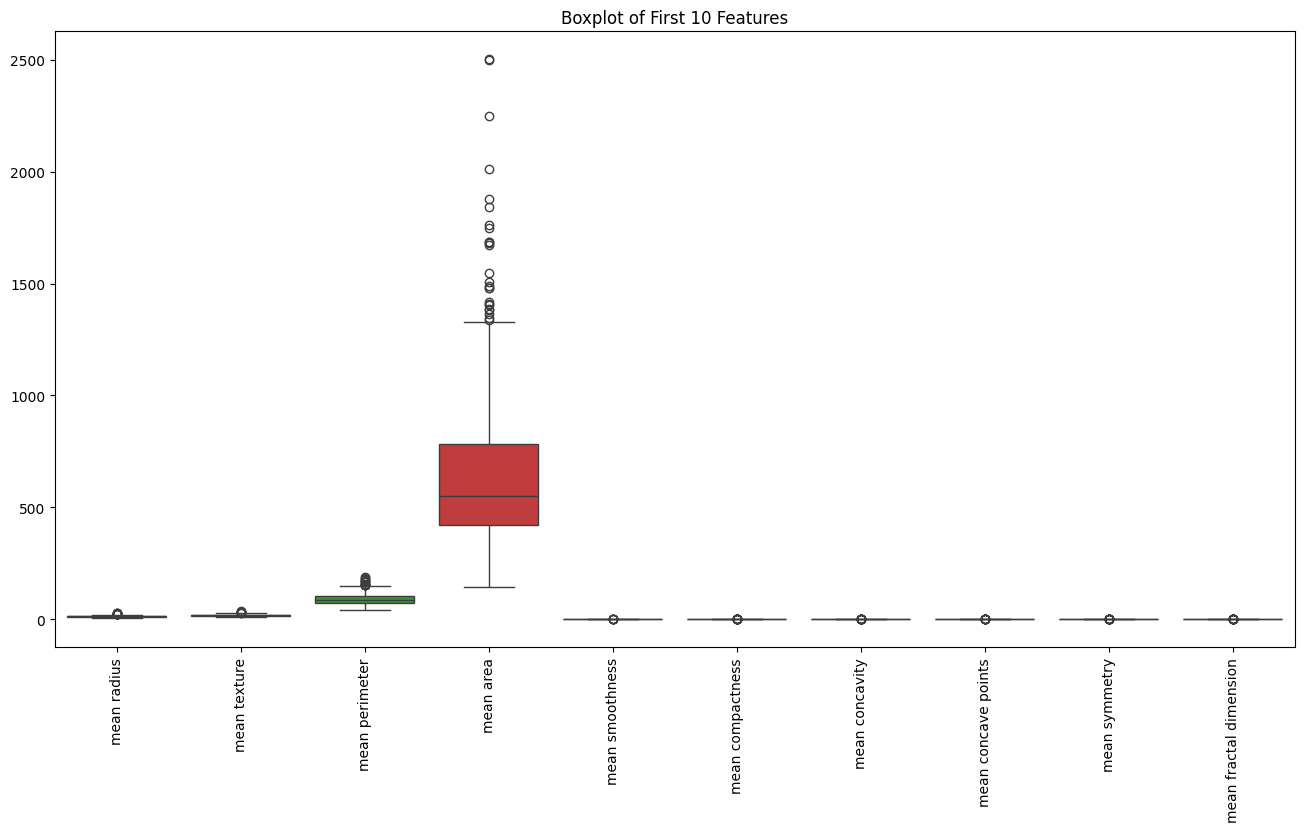

In [31]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.iloc[:, :10])
plt.title("Boxplot of First 10 Features")
plt.xticks(rotation=90)
plt.show()

In [32]:
X = df.iloc[:, :-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:
y_pred = svm_model.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[39  4]
 [ 1 70]]


In [36]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [37]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [40]:
y_pred = svc_model.predict(X_test)

In [41]:
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171

Confusion Matrix for SVM:
[[ 52  11]
 [  0 108]]


In [42]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}


In [43]:
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [44]:
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

Best Parameters from GridSearchCV:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [45]:
y_pred_grid = grid_search.predict(X_test)

In [46]:
print("Classification Report for Optimized SVM with GridSearchCV:")
print(classification_report(y_test, y_pred_grid))
print("Confusion Matrix for Optimized SVM with GridSearchCV:")
print(confusion_matrix(y_test, y_pred_grid))

Classification Report for Optimized SVM with GridSearchCV:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix for Optimized SVM with GridSearchCV:
[[ 57   6]
 [  2 106]]
